# GA_CHALLENGES_NEW

## import libraries

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import warnings
from copy import deepcopy
import os
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random
import json 
from pandas.io.json import json_normalize
%matplotlib inline

## function to deal with json format column

In [2]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] # Columns that have json format
def json_read(df):
    data_frame =  df
    df = pd.read_csv(data_frame, 
                     converters={column: json.loads for column in columns}, 
                     dtype={'fullVisitorId': 'str'})     
    for column in columns:
                     
        column_as_df = json_normalize(df[column]) 
       
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    
    return df 

#function_code_credit:https://www.kaggle.com/anuse/kernels

In [118]:
train = json_read("C:\Users\chris\Desktop\train.csv")
test = json_read('C:\Users\chris\Desktop\test.csv')

In [148]:
print(train.shape,test.shape)

(903653, 27) (804684, 27)


In [20]:
train.head()

channelGrouping      date        fullVisitorId  \
0  Organic Search  20160902  1131660440785968503   
1  Organic Search  20160902   377306020877927890   
2  Organic Search  20160902  3895546263509774583   
3  Organic Search  20160902  4763447161404445595   
4  Organic Search  20160902    27294437909732085   

                        sessionId  socialEngagementType     visitId  \
0  1131660440785968503_1472830385  Not Socially Engaged  1472830385   
1   377306020877927890_1472880147  Not Socially Engaged  1472880147   
2  3895546263509774583_1472865386  Not Socially Engaged  1472865386   
3  4763447161404445595_1472881213  Not Socially Engaged  1472881213   
4    27294437909732085_1472822600  Not Socially Engaged  1472822600   

   visitNumber  visitStartTime device.browser          device.browserVersion  \
0            1      1472830385         Chrome  not available in demo dataset   
1            1      1472880147        Firefox  not available in demo dataset   
2            1      1472865386         Chrome  not available in demo dataset   
3            1      1472881213     UC Browser  not available in demo dataset   
4            2      1472822600         Chrome  not available in demo dataset   

   ... trafficSource.adwordsClickInfo.criteriaParameters  \
0  ...                     not available in demo dataset   
1  ...                     not available in demo dataset   
2  ...                     not available in demo dataset   
3  ...                     not available in demo dataset   
4  ...                     not available in demo dataset   

  trafficSource.isTrueDirect trafficSource.referralPath  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                       True                        NaN   

   trafficSource.adwordsClickInfo.page trafficSource.adwordsClickInfo.slot  \
0                                  NaN                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                                 NaN   
4                                  NaN                                 NaN   

  trafficSource.adwordsClickInfo.gclId  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

  trafficSource.adwordsClickInfo.adNetworkType  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

  trafficSource.adwordsClickInfo.isVideoAd trafficSource.adContent  \
0                                      NaN                     NaN   
1                                      NaN                     NaN   
2                                      NaN                     NaN   
3                                      NaN                     NaN   
4                                      NaN                     NaN   

  trafficSource.campaignCode  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 55 columns]

# PIPELINE 

## - investigate/ cleaning

In [23]:
train.columns

Index(['device.browserSize', 'totals.visits', 'device.language',
       'geoNetwork.country', 'trafficSource.campaign', 'trafficSource.source',
       'geoNetwork.region', 'trafficSource.isTrueDirect',
       'geoNetwork.latitude', 'trafficSource.adwordsClickInfo.slot',
       'visitNumber', 'device.mobileDeviceModel', 'geoNetwork.networkLocation',
       'device.mobileDeviceInfo', 'geoNetwork.cityId',
       'trafficSource.adwordsClickInfo.criteriaParameters',
       'device.mobileDeviceBranding', 'geoNetwork.subContinent',
       'trafficSource.adwordsClickInfo.gclId',
       'device.mobileDeviceMarketingName', 'visitStartTime',
       'device.flashVersion', 'geoNetwork.metro', 'geoNetwork.continent',
       'trafficSource.referralPath', 'dataset', 'totals.pageviews',
       'totals.bounces', 'totals.hits', 'visitId', 'channelGrouping',
       'trafficSource.adwordsClickInfo.page', 'geoNetwork.networkDomain',
       'trafficSource.adContent', 'trafficSource.keyword',
       'device.o

In [86]:
#dropping unique column
const_cols = [c for c in train.columns if train[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystemVersion',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [87]:
cols_to_drop = const_cols + ['sessionId',]
train = train.drop(cols_to_drop + ["trafficSource.campaignCode"], axis=1)
test = test.drop(cols_to_drop, axis=1)

In [88]:
CAT = train.columns[train.dtypes == object]
CONT = [c for c in train.columns if c not in CAT ]

In [89]:
CONT

['date', 'visitId', 'visitNumber', 'visitStartTime', 'device.isMobile']

In [90]:
CAT

Index(['channelGrouping', 'fullVisitorId', 'device.browser',
       'device.operatingSystem', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.networkDomain', 'totals.hits', 'totals.pageviews',
       'totals.bounces', 'totals.newVisits', 'totals.transactionRevenue',
       'trafficSource.campaign', 'trafficSource.source',
       'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.isTrueDirect', 'trafficSource.referralPath',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adContent'],
      dtype='object')

In [91]:
no_use = ["visitNumber", "date", "fullVisitorId", "visitId", "visitStartTime", 'totals.transactionRevenue']

In [92]:
#function to check missing columns
def values_missing(check):
    total = check.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (check.isnull().sum() / check.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total and percent of missing values: ")
    print (df_train[~(df_train['Total'] == 0)]) # Returning values of nulls different of 0
    
    return

In [17]:
values_missing(train)

Total and percent of missing values: 
                                               Total    Percent
trafficSource.adContent                       892707  98.788694
trafficSource.adwordsClickInfo.adNetworkType  882193  97.625195
trafficSource.adwordsClickInfo.slot           882193  97.625195
trafficSource.adwordsClickInfo.page           882193  97.625195
trafficSource.adwordsClickInfo.gclId          882092  97.614018
trafficSource.referralPath                    572712  63.377425
trafficSource.keyword                         502929  55.655102


In [93]:
train['totals.pageviews'].fillna(0, inplace=True)#.astype(str) #filling NA's with 1(since least for a visit to the site means 1 page seen)
train['totals.newVisits'].fillna(0, inplace=True)#.astype(str) #filling NA's with 0(0 is suitable for Nan here)
train['totals.bounces'].fillna(0, inplace=True)#.astype(str)   #filling NA's with 0(0 is suitable for Nan here)
train["totals.transactionRevenue"] = np.log1p(train["totals.transactionRevenue"].fillna(0.0).astype(float)) #filling NA with zero
train['date'] = pd.to_datetime(train["date"], format="%Y%m%d") #convert to datetime
train['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False is its NAn
train['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) 

test['totals.pageviews'].fillna(0, inplace=True)#.astype(str) #filling NA's with 1(since least for a visit to the site means 1 page seen)
test['totals.newVisits'].fillna(0, inplace=True)#.astype(str) #filling NA's with 0(0 is suitable for Nan here)
test['totals.bounces'].fillna(0, inplace=True)#.astype(str)   #filling NA's with 0(0 is suitable for Nan here)
test['date'] = pd.to_datetime(test["date"], format="%Y%m%d") #convert to datetime
test['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False is its NAn
test['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) 



In [94]:
train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device.browser', 'device.operatingSystem',
       'device.isMobile', 'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.networkDomain',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.transactionRevenue', 'trafficSource.campaign',
       'trafficSource.source', 'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.isTrueDirect', 'trafficSource.referralPath',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adContent'],
      dtype='object')

In [103]:
train_features = [_f for _f in train.columns if _f not in no_use]

In [104]:
train_features

['channelGrouping',
 'device.browser',
 'device.operatingSystem',
 'device.isMobile',
 'device.deviceCategory',
 'geoNetwork.continent',
 'geoNetwork.subContinent',
 'geoNetwork.country',
 'geoNetwork.region',
 'geoNetwork.metro',
 'geoNetwork.city',
 'geoNetwork.networkDomain',
 'totals.hits',
 'totals.pageviews',
 'totals.bounces',
 'totals.newVisits',
 'trafficSource.campaign',
 'trafficSource.source',
 'trafficSource.medium',
 'trafficSource.isTrueDirect',
 'trafficSource.adwordsClickInfo.isVideoAd']

In [97]:
test.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device.browser', 'device.operatingSystem',
       'device.isMobile', 'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.networkDomain',
       'totals.hits', 'totals.pageviews', 'totals.newVisits', 'totals.bounces',
       'trafficSource.campaign', 'trafficSource.source',
       'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.isTrueDirect', 'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.referralPath', 'trafficSource.adContent'],
      dtype='object')

In [98]:
#dropping more columns that we don't need
dropcl = ['trafficSource.referralPath','trafficSource.adwordsClickInfo.slot','trafficSource.adwordsClickInfo.gclId',
          'trafficSource.adContent','trafficSource.adwordsClickInfo.adNetworkType',
         'trafficSource.keyword','trafficSource.adwordsClickInfo.page',]

In [99]:
train = train.drop(dropcl, axis=1)
test = test.drop(dropcl, axis=1)

# DATA PROCESSING

In [100]:
import gc, pickle
import plotly.express as px
import plotly.graph_objects as go
import ppscore as pps
#import shap, optuna
from pdpbox import pdp
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
rmse = lambda true, pred: mse(true, pred) ** 0.5
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold
from sklearn.decomposition import PCA

In [105]:
for col in train_features:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))

channelGrouping
device.browser
device.operatingSystem
device.isMobile
device.deviceCategory
geoNetwork.continent
geoNetwork.subContinent
geoNetwork.country
geoNetwork.region
geoNetwork.metro
geoNetwork.city
geoNetwork.networkDomain
totals.hits
totals.pageviews
totals.bounces
totals.newVisits
trafficSource.campaign
trafficSource.source
trafficSource.medium
trafficSource.isTrueDirect
trafficSource.adwordsClickInfo.isVideoAd


In [106]:
train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device.browser', 'device.operatingSystem',
       'device.isMobile', 'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.networkDomain',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.transactionRevenue', 'trafficSource.campaign',
       'trafficSource.source', 'trafficSource.medium',
       'trafficSource.isTrueDirect',
       'trafficSource.adwordsClickInfo.isVideoAd'],
      dtype='object')

In [107]:
X = train.drop(no_use, axis=1)
y = train['totals.transactionRevenue']
testX = test.drop([col for col in no_use if col in test.columns], axis=1)

In [108]:
#train using train dataset alone

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [110]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(722922, 21) (180731, 21) (722922,) (180731,)


In [111]:
#define function for evaluation .for RSME AND MAE
def get_error(pred, true):
    print(f'RMSE:       {rmse(true, pred)}')
    print(f'MAE:        {mae(true, pred)}')

In [112]:
#get the baseline for evaluation
get_error(pred = np.array([np.mean(y_train) for _ in range(len(y_test))]),
          true = y_test)

RMSE:       1.9927516042145041
MAE:        0.44640439424358425


##  test on random parameters using RANDOM FOREST REGRESSOR

In [113]:
first_param = {'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [114]:
better = {'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 110}

In [115]:
third_param = {'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}

### test 1

In [116]:
model = RandomForestRegressor(**first_param)

trained = model.fit(X_train, y_train)

pred = trained .predict(X_test)

In [118]:
get_error(pred =pred, true = y_test)

RMSE:       1.693572367008892
MAE:        0.3275328495361325


### test 2

In [121]:
model = RandomForestRegressor(**better)

trained = model.fit(X_train, y_train)

pred = trained .predict(X_test)

In [122]:
get_error(pred =pred, true = y_test)

RMSE:       1.6937315472755712
MAE:        0.3273785116722457


### test 3

In [119]:
model = RandomForestRegressor(**third_param)

trained = model.fit(X_train, y_train)

pred = trained .predict(X_test)

In [120]:
get_error(pred =pred, true = y_test)

RMSE:       1.7520459296348883
MAE:        0.3514986012763201


### sample prediction on test dataset

In [124]:
test['pred'] = model.predict(testX)

In [125]:
test.head()

channelGrouping       date        fullVisitorId     visitId  visitNumber  \
0                4 2017-10-16  6167871330617112363  1508151024            2   
1                4 2017-10-16  0643697640977915618  1508175522            1   
2                4 2017-10-16  6059383810968229466  1508143220            1   
3                4 2017-10-16  2376720078563423631  1508193530            1   
4                4 2017-10-16  2314544520795440038  1508217442            1   

   visitStartTime  device.browser  device.operatingSystem  device.isMobile  \
0      1508151024              58                      21                0   
1      1508175522              58                      13                0   
2      1508143220              58                      21                0   
3      1508193530              99                      16                1   
4      1508217442              99                      21                0   

   device.deviceCategory  ...  totals.hits  totals.pageviews  \
0                      0  ...          136                66   
1                      0  ...          159                85   
2                      0  ...          184               110   
3                      1  ...          196                66   
4                      0  ...          208                66   

   totals.newVisits  totals.bounces  trafficSource.campaign  \
0                 0               0                      29   
1                 1               0                      29   
2                 1               0                      29   
3                 1               0                      29   
4                 1               0                      29   

   trafficSource.source  trafficSource.medium  trafficSource.isTrueDirect  \
0                   122                     5                           1   
1                   122                     5                           0   
2                   122                     5                           0   
3                   122                     5                           0   
4                   122                     5                           0   

   trafficSource.adwordsClickInfo.isVideoAd      pred  
0                                         1  0.054807  
1                                         1  0.034680  
2                                         1  0.235629  
3                                         1  0.000574  
4                                         1  0.000882  

[5 rows x 27 columns]

# TUNNING AND OPTIMIZATION

## setting random parameters for tunning

In [79]:
# Create the random grid
random_grid = {
    'n_estimators': [500,550,600],
    'max_features': [ 'auto','sqrt'],
    'max_depth': [8,9,10],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2],
    'bootstrap': [True],
}

# calculate number of possible parameter combinations
for i, n in enumerate([len(v) for v in random_grid.values()]):
    if i+1 == 1: m = n
    else: m *= n
print(f'Number of Combinations: {m}')

Number of Combinations: 108


In [ ]:
#sample of data to tune (25,000)
sam_xtrain = sam_xtrain.head(25000)
sam_ytrain = y_train.head(25000)

## Randomized search

In [82]:
# use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                               param_distributions = random_grid,
                               n_iter =80, # search across n combinations
                               cv = 5,        # n fold cross validation
                               verbose = 2,
                               n_jobs = -1)

# Fit the random search model on purchased datatset
rf_random.fit(sam_xtrain,sam_ytrain)  

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 18.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [83]:
rf_tuned = rf_random.best_params_

In [84]:
rf_tuned

{'n_estimators': 500,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [166]:
rf_tuned = {'n_estimators': 500,
            'min_samples_split': 3,
            'min_samples_leaf': 2,
            'max_features': 'auto',
            'max_depth': 10,
            'bootstrap': True}

### test 4 with 1st tuned parameters

In [126]:
model = RandomForestRegressor(**rf_tuned)

trained = model.fit(X_train, y_train)

pred = trained .predict(X_test)

In [127]:
get_error(pred =pred, true = y_test)

RMSE:       1.6931594400662877
MAE:        0.3273953880682689


## Grid search

In [88]:
param_grid = {
    'n_estimators': [450,470,490,500],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [2,3,4],
    'max_features': ['auto'],
    'max_depth': [10,12,14],
    'bootstrap': [True],
}
# calculate number of possible parameter combinations
for i, n in enumerate([len(v) for v in param_grid.values()]):
    if i+1 == 1: m = n
    else: m *= n
print(f'Number of Combinations: {m}')

Number of Combinations: 108


In [90]:
# run the grid search
# init new rf instance
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 7,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(sam_xtrain,sam_ytrain)

Fitting 7 folds for each of 108 candidates, totalling 756 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 756 out of 756 | elapsed: 53.7min finished


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [91]:
best_grid = grid_search.best_params_

In [92]:
best_grid

{'bootstrap': True,
 'max_depth': 14,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 500}

In [167]:
best_grid = {'bootstrap': True,
             'max_depth': 14,
             'max_features': 'auto',
             'min_samples_leaf': 4,
             'min_samples_split': 5,
             'n_estimators': 500}

### test 5 with 2nd tuned parameters

In [128]:
model = RandomForestRegressor(**best_grid)

trained = model.fit(X_train, y_train)

pred = trained .predict(X_test)

In [130]:
get_error(pred =pred, true = y_test)

RMSE:       1.6678770799604192
MAE:        0.30827673321898674


######  BEST RESULT SO FAR IS 1.667 and this was after we used the tuned grid seacrched parameters. a significant reduction from 1.75 with th erandom parameters we used

# FEATURES IMPORTANCE,CORRELATION AND PREDICTIVENESS

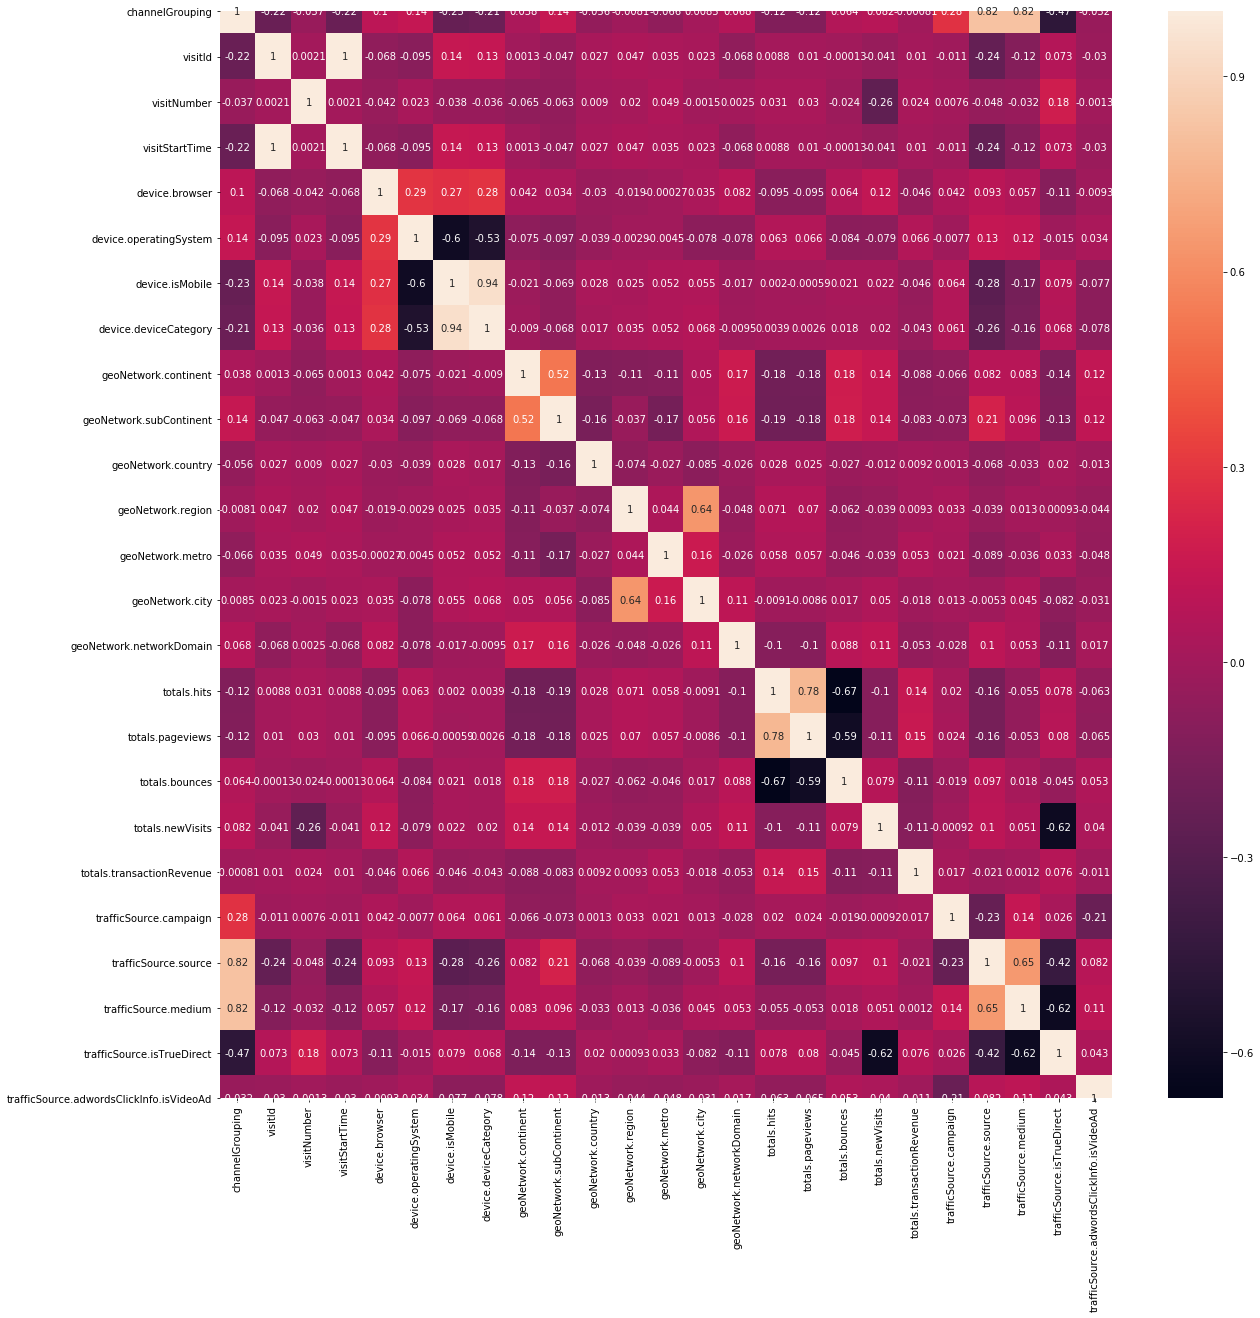

In [131]:
#using heatmap to examine the correlation amongs the columns
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

In [132]:
#üsing the pps
pps_matrix = pps.matrix(train)

In [133]:
# heatmap
fig = go.Figure(
    data = go.Heatmap(
        z = pps_matrix.values,
        x = pps_matrix.index,
        y = pps_matrix.columns
    )
)
fig.update_layout(title_text = 'Predictive Power Score Heatmap')
fig.show()

In [134]:
#get the corellation usinf the corr() method
correla = train.corr()
correla

channelGrouping   visitId  \
channelGrouping                                  1.000000 -0.220079   
visitId                                         -0.220079  1.000000   
visitNumber                                     -0.036786  0.002069   
visitStartTime                                  -0.220079  1.000000   
device.browser                                   0.100524 -0.068153   
device.operatingSystem                           0.136856 -0.095427   
device.isMobile                                 -0.230524  0.144332   
device.deviceCategory                           -0.212442  0.132524   
geoNetwork.continent                             0.038485  0.001315   
geoNetwork.subContinent                          0.141821 -0.047265   
geoNetwork.country                              -0.055918  0.027166   
geoNetwork.region                               -0.008092  0.046852   
geoNetwork.metro                                -0.066253  0.035382   
geoNetwork.city                                  0.008474  0.023030   
geoNetwork.networkDomain                         0.067997 -0.068325   
totals.hits                                     -0.123834  0.008806   
totals.pageviews                                -0.122241  0.010308   
totals.bounces                                   0.064069 -0.000131   
totals.newVisits                                 0.082404 -0.041035   
totals.transactionRevenue                       -0.000807  0.010491   
trafficSource.campaign                           0.276348 -0.010884   
trafficSource.source                             0.822809 -0.235318   
trafficSource.medium                             0.820797 -0.115635   
trafficSource.isTrueDirect                      -0.467853  0.073189   
trafficSource.adwordsClickInfo.isVideoAd        -0.032316 -0.029576   

                                          visitNumber  visitStartTime  \
channelGrouping                             -0.036786       -0.220079   
visitId                                      0.002069        1.000000   
visitNumber                                  1.000000        0.002069   
visitStartTime                               0.002069        1.000000   
device.browser                              -0.041965       -0.068153   
device.operatingSystem                       0.022920       -0.095427   
device.isMobile                             -0.037667        0.144332   
device.deviceCategory                       -0.035758        0.132524   
geoNetwork.continent                        -0.064821        0.001315   
geoNetwork.subContinent                     -0.063323       -0.047265   
geoNetwork.country                           0.009032        0.027166   
geoNetwork.region                            0.020092        0.046852   
geoNetwork.metro                             0.048654        0.035382   
geoNetwork.city                             -0.001529        0.023030   
geoNetwork.networkDomain                     0.002452       -0.068325   
totals.hits                                  0.030799        0.008806   
totals.pageviews                             0.029684        0.010308   
totals.bounces                              -0.023754       -0.000131   
totals.newVisits                            -0.255077       -0.041035   
totals.transactionRevenue                    0.023666        0.010491   
trafficSource.campaign                       0.007594       -0.010884   
trafficSource.source                        -0.048051       -0.235318   
trafficSource.medium                        -0.031575       -0.115635   
trafficSource.isTrueDirect                   0.181692        0.073189   
trafficSource.adwordsClickInfo.isVideoAd    -0.001332       -0.029576   

                                          device.browser  \
channelGrouping                                 0.100524   
visitId                                        -0.068153   
visitNumber                                    -0.041965   
visitStartTime                                 -0.068153

In [135]:
#correlation with the the target 
correla[['totals.transactionRevenue']].sort_values(by='totals.transactionRevenue',ascending = False)

totals.transactionRevenue
totals.transactionRevenue                                  1.000000
totals.pageviews                                           0.150488
totals.hits                                                0.140181
trafficSource.isTrueDirect                                 0.076432
device.operatingSystem                                     0.065848
geoNetwork.metro                                           0.053478
visitNumber                                                0.023666
trafficSource.campaign                                     0.016849
visitStartTime                                             0.010491
visitId                                                    0.010491
geoNetwork.region                                          0.009266
geoNetwork.country                                         0.009180
trafficSource.medium                                       0.001241
channelGrouping                                           -0.000807
trafficSource.adwordsClickInfo.isVideoAd                  -0.011329
geoNetwork.city                                           -0.017665
trafficSource.source                                      -0.021283
device.deviceCategory                                     -0.042843
device.isMobile                                           -0.046071
device.browser                                            -0.046123
geoNetwork.networkDomain                                  -0.052783
geoNetwork.subContinent                                   -0.083230
geoNetwork.continent                                      -0.088376
totals.newVisits                                          -0.108003
totals.bounces                                            -0.113049

In [136]:
# Feature importances

In [137]:
def get_feature_importance(model, feature_names):
    # compute feature importances
    imp = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending = False)

    # add feature type
    imp['feat_type'] = imp.feature.apply(lambda feat: 'categorical' if feat in CT else 'continuous')
    
    return imp.sort_values('importance', ascending = False)

In [138]:
imp = get_feature_importance(model, X_train.columns.tolist())

In [139]:
px.bar(imp, x = 'feature', y = 'importance', color = 'feat_type')

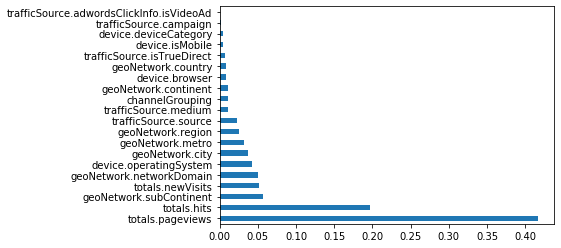

In [140]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

# SUBMISSION

In [142]:
test['PredictedLogRevenue'] = model.predict(testX)

In [143]:
test.head()

channelGrouping       date        fullVisitorId     visitId  visitNumber  \
0                4 2017-10-16  6167871330617112363  1508151024            2   
1                4 2017-10-16  0643697640977915618  1508175522            1   
2                4 2017-10-16  6059383810968229466  1508143220            1   
3                4 2017-10-16  2376720078563423631  1508193530            1   
4                4 2017-10-16  2314544520795440038  1508217442            1   

   visitStartTime  device.browser  device.operatingSystem  device.isMobile  \
0      1508151024              58                      21                0   
1      1508175522              58                      13                0   
2      1508143220              58                      21                0   
3      1508193530              99                      16                1   
4      1508217442              99                      21                0   

   device.deviceCategory  ...  totals.hits  totals.pageviews  \
0                      0  ...          136                66   
1                      0  ...          159                85   
2                      0  ...          184               110   
3                      1  ...          196                66   
4                      0  ...          208                66   

   totals.newVisits  totals.bounces  trafficSource.campaign  \
0                 0               0                      29   
1                 1               0                      29   
2                 1               0                      29   
3                 1               0                      29   
4                 1               0                      29   

   trafficSource.source  trafficSource.medium  trafficSource.isTrueDirect  \
0                   122                     5                           1   
1                   122                     5                           0   
2                   122                     5                           0   
3                   122                     5                           0   
4                   122                     5                           0   

   trafficSource.adwordsClickInfo.isVideoAd  PredictedLogRevenue  
0                                         1             0.015992  
1                                         1             0.006099  
2                                         1             0.164179  
3                                         1             0.000000  
4                                         1             0.000000  

[5 rows x 27 columns]

In [144]:
sub = test.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()

In [145]:
sub

fullVisitorId  PredictedLogRevenue
0       0000000259678714014             0.566437
1       0000049363351866189             0.000000
2       0000053049821714864             0.000000
3       0000059488412965267             0.000000
4       0000085840370633780             0.000000
...                     ...                  ...
617237  9999905960465191827             0.000000
617238  9999941518946450908             0.000000
617239  9999969142283897422             0.012598
617240  9999985820452794361             0.023992
617241  9999997304197521748             0.001699

[617242 rows x 2 columns]

In [146]:
sub.columns = ["fullVisitorId", "PredictedLogRevenue"]

In [147]:
sub.head()

fullVisitorId  PredictedLogRevenue
0  0000000259678714014             0.566437
1  0000049363351866189             0.000000
2  0000053049821714864             0.000000
3  0000059488412965267             0.000000
4  0000085840370633780             0.000000

In [149]:
sub.to_csv('/Users/chris/Desktop/chris_files.csv/submission2.csv',index=False)

 #####  No Feature engineering was done on the dataset. This is because I wanted to see what the original data predicted.
 #####  Below I will take a new challenges with some extensive Feature engineering

# Feature engineering

In [3]:
raw_train = json_read('train.csv')
raw_test = json_read('test.csv')

In [4]:
raw_train

channelGrouping      date        fullVisitorId  \
0       Organic Search  20160902  1131660440785968503   
1       Organic Search  20160902   377306020877927890   
2       Organic Search  20160902  3895546263509774583   
3       Organic Search  20160902  4763447161404445595   
4       Organic Search  20160902    27294437909732085   
...                ...       ...                  ...   
903648          Social  20170104  5123779100307500332   
903649          Social  20170104  7231728964973959842   
903650          Social  20170104  5744576632396406899   
903651          Social  20170104  2709355455991750775   
903652          Social  20170104  0814900163617805053   

                             sessionId  socialEngagementType     visitId  \
0       1131660440785968503_1472830385  Not Socially Engaged  1472830385   
1        377306020877927890_1472880147  Not Socially Engaged  1472880147   
2       3895546263509774583_1472865386  Not Socially Engaged  1472865386   
3       4763447161404445595_1472881213  Not Socially Engaged  1472881213   
4         27294437909732085_1472822600  Not Socially Engaged  1472822600   
...                                ...                   ...         ...   
903648  5123779100307500332_1483554750  Not Socially Engaged  1483554750   
903649  7231728964973959842_1483543798  Not Socially Engaged  1483543798   
903650  5744576632396406899_1483526434  Not Socially Engaged  1483526434   
903651  2709355455991750775_1483592857  Not Socially Engaged  1483592857   
903652  0814900163617805053_1483574474  Not Socially Engaged  1483574474   

        visitNumber  visitStartTime   device.browser  \
0                 1      1472830385           Chrome   
1                 1      1472880147          Firefox   
2                 1      1472865386           Chrome   
3                 1      1472881213       UC Browser   
4                 2      1472822600           Chrome   
...             ...             ...              ...   
903648            1      1483554750           Chrome   
903649            1      1483543798           Chrome   
903650            1      1483526434  Android Webview   
903651            1      1483592864           Chrome   
903652            1      1483574474           Chrome   

                device.browserVersion  ...  \
0       not available in demo dataset  ...   
1       not available in demo dataset  ...   
2       not available in demo dataset  ...   
3       not available in demo dataset  ...   
4       not available in demo dataset  ...   
...                               ...  ...   
903648  not available in demo dataset  ...   
903649  not available in demo dataset  ...   
903650  not available in demo dataset  ...   
903651  not available in demo dataset  ...   
903652  not available in demo dataset  ...   

       trafficSource.adwordsClickInfo.criteriaParameters  \
0                          not available in demo dataset   
1                          not available in demo dataset   
2                          not available in demo dataset   
3                          not available in demo dataset   
4                          not available in demo dataset   
...                                                  ...   
903648                     not available in demo dataset   
903649                     not available in demo dataset   
903650                     not available in demo dataset   
903651                     not available in demo dataset   
903652                     not available in demo dataset   

       trafficSource.isTrueDirect trafficSource.referralPath  \
0                             NaN                        NaN   
1                             NaN                        NaN   
2                             NaN                        NaN   
3                             NaN                        NaN   
4                            True                        NaN   
...                           ...                        ...   
903648        

In [14]:
raw_train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserVersion', 'device.browserSize',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.isMobile', 'device.mobileDeviceBranding',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.flashVersion', 'device.language', 'device.screenColors',
       'device.screenResolution', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.t

In [16]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    903653 non-null  object
 1   date                                               903653 non-null  int64 
 2   fullVisitorId                                      903653 non-null  object
 3   sessionId                                          903653 non-null  object
 4   socialEngagementType                               903653 non-null  object
 5   visitId                                            903653 non-null  int64 
 6   visitNumber                                        903653 non-null  int64 
 7   visitStartTime                                     903653 non-null  int64 
 8   device.browser                                     903653 non-null  object
 9   devi

In [5]:
raw_train.to_csv('/Users/chris/Desktop/chris_files.csv/raw_train.csv',index=False)
raw_test.to_csv('/Users/chris/Desktop/chris_files.csv/raw_test.csv',index=False)

In [6]:
rfr = deepcopy(raw_train)
rfr_test = deepcopy(raw_test)

In [23]:
rfr['totals.pageviews'] = rfr['totals.pageviews'].astype(float) # setting numerical column as integer
rfr['totals.newVisits'] = rfr['totals.newVisits'].astype(float) # setting numerical column as integer
rfr['totals.bounces'] = rfr['totals.bounces'].astype(float)  # setting numerical column as integer
rfr["totals.hits"] = rfr["totals.hits"].astype(float) # setting numerical to float

rfr_test['totals.pageviews'] = rfr_test['totals.pageviews'].astype(float) # setting numerical column as integer
rfr_test['totals.newVisits'] = rfr_test['totals.newVisits'].astype(float) # setting numerical column as integer
rfr_test['totals.bounces'] = rfr_test['totals.bounces'].astype(float)  # setting numerical column as integer
rfr_test["totals.hits"] = rfr_test["totals.hits"].astype(float) # setting numerical to float

In [7]:
rfr["date"] = pd.to_datetime(rfr["date"])   
rfr["year"] = rfr['date'].dt.year
rfr["month"] = rfr['date'].dt.month
rfr["day"] = rfr['date'].dt.day
rfr["weekday"] = rfr['date'].dt.weekday
rfr['weekofyear'] = rfr['date'].dt.weekofyear
rfr['month_unique_user_count'] = rfr.groupby('month')['fullVisitorId'].transform('nunique')
rfr['day_unique_user_count'] = rfr.groupby('day')['fullVisitorId'].transform('nunique')
rfr['weekday_unique_user_count'] = rfr.groupby('weekday')['fullVisitorId'].transform('nunique')

# on test

rfr_test["date"] = pd.to_datetime(rfr_test["date"])   
rfr_test["year"] = rfr_test['date'].dt.year
rfr_test["month"] = rfr_test['date'].dt.month
rfr_test["day"] = rfr_test['date'].dt.day
rfr_test["weekday"] = rfr_test['date'].dt.weekday
rfr_test['weekofyear'] = rfr_test['date'].dt.weekofyear
rfr_test['month_unique_user_count'] = rfr_test.groupby('month')['fullVisitorId'].transform('nunique')
rfr_test['day_unique_user_count'] = rfr_test.groupby('day')['fullVisitorId'].transform('nunique')
rfr_test['weekday_unique_user_count'] = rfr_test.groupby('weekday')['fullVisitorId'].transform('nunique')

In [24]:
rfr['mean_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('mean')
rfr['sum_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('sum')
rfr['max_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('max')
rfr['min_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('min')
rfr['var_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('var')


# on test

rfr_test['mean_hits_per_day'] = rfr_test.groupby(['day'])['totals.hits'].transform('mean')
rfr_test['sum_hits_per_day'] = rfr_test.groupby(['day'])['totals.hits'].transform('sum')
rfr_test['max_hits_per_day'] = rfr_test.groupby(['day'])['totals.hits'].transform('max')
rfr_test['min_hits_per_day'] = rfr_test.groupby(['day'])['totals.hits'].transform('min')
rfr_test['var_hits_per_day'] = rfr_test.groupby(['day'])['totals.hits'].transform('var')

In [17]:
rfr['browser.category'] = rfr['device.browser'] + '_' + rfr['device.deviceCategory']
rfr['browser.operatingSystem'] = rfr['device.browser'] + '_' + rfr['device.operatingSystem']
rfr['source.country'] = rfr['trafficSource.source'] + '_' + rfr['geoNetwork.country']

#on test

rfr_test['browser.category'] = rfr_test['device.browser'] + '_' + rfr_test['device.deviceCategory']
rfr_test['browser.operatingSystem'] = rfr_test['device.browser'] + '_' + rfr_test['device.operatingSystem']
rfr_test['source.country'] = rfr_test['trafficSource.source'] + '_' + rfr_test['geoNetwork.country']

In [25]:
rfr['sum_pageviews.per.network.domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('sum')
rfr['count_pageviews_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('count')
rfr['mean_pageviews_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('mean')

#on test

rfr_test['sum_pageviews.per.network.domain'] = rfr_test.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('sum')
rfr_test['count_pageviews_per_network_domain'] = rfr_test.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('count')
rfr_test['mean_pageviews_per_network_domain'] = rfr_test.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('mean')

In [26]:
rfr['sum_hits_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.hits'].transform('sum')
rfr['count_hits_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.hits'].transform('count')
rfr['mean_hits_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.hits'].transform('mean')

# on test

rfr_test['sum_hits_per_network_domain'] = rfr_test.groupby('geoNetwork.networkDomain')['totals.hits'].transform('sum')
rfr_test['count_hits_per_network_domain'] = rfr_test.groupby('geoNetwork.networkDomain')['totals.hits'].transform('count')
rfr_test['mean_hits_per_network_domain'] = rfr_test.groupby('geoNetwork.networkDomain')['totals.hits'].transform('mean')

In [27]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 77 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   channelGrouping                                    903653 non-null  object        
 1   date                                               903653 non-null  datetime64[ns]
 2   fullVisitorId                                      903653 non-null  object        
 3   sessionId                                          903653 non-null  object        
 4   socialEngagementType                               903653 non-null  object        
 5   visitId                                            903653 non-null  int64         
 6   visitNumber                                        903653 non-null  int64         
 7   visitStartTime                                     903653 non-null  int64         
 8   devi

In [ ]:
rfr_test.head()

## pipeline

In [28]:
#dropping unique column
unique_cols = [c for c in rfr.columns if rfr[c].nunique(dropna=False)==1 ]
unique_cols

['socialEngagementType',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystemVersion',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters',
 'year',
 'month',
 'day',
 'weekday',
 'weekofyear',
 'month_unique_user_count',
 'day_unique_user_count',
 'weekday_unique_user_count',
 'mean_hits_per_day',
 'sum_hits_per_day',
 'max_hits_per_day',
 'min_hits_per_day',
 'var_hits_per_day']

In [31]:
to_drop = unique_cols 
rfr = rfr.drop(to_drop + ["trafficSource.campaignCode"], axis=1)
rfr_test = rfr_test.drop(to_drop, axis=1)

In [32]:
#dropping more columns that we don't need
dropmore = ['trafficSource.referralPath','trafficSource.adwordsClickInfo.slot','trafficSource.adwordsClickInfo.gclId',
          'trafficSource.adContent','trafficSource.adwordsClickInfo.adNetworkType',
         'trafficSource.keyword','trafficSource.adwordsClickInfo.page','sessionId']

In [33]:
rfr = rfr.drop(dropmore, axis=1)
rfr_test = rfr_test.drop(dropmore, axis=1)

In [21]:
#function to check missing columns
def values_missing(check):
    total = check.isna().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (check.isna().sum() / check.isna().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total and percent of missing values: ")
    print (df_train[~(df_train['Total'] == 0)]) # Returning values of nulls different of 0
    
    return

In [34]:
values_missing(rfr)

Total and percent of missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [13]:
rfr['totals.pageviews'].fillna(0, inplace=True).astype(float) #filling NA's with 1(since least for a visit to the site means 1 page seen)
#rfr['totals.newVisits'].fillna(0, inplace=True)#.astype(str) #filling NA's with 0(0 is suitable for Nan here)
#rfr['totals.bounces'].fillna(0, inplace=True)#.astype(str)   #filling NA's with 0(0 is suitable for Nan here)
#rfr["totals.transactionRevenue"] = np.log1p(rfr["totals.transactionRevenue"].fillna(0.0).astype(float)) #filling NA with zero
#rfr['date'] = pd.to_datetime(train["date"], format="%Y%m%d") #convert to datetime
rfr['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False is its NAn
rfr['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) 

rfr_test['totals.pageviews'].fillna(0, inplace=True)#.astype(str) #filling NA's with 1(since least for a visit to the site means 1 page seen)
rfr_test['totals.newVisits'].fillna(0, inplace=True)#.astype(str) #filling NA's with 0(0 is suitable for Nan here)
rfr_test['totals.bounces'].fillna(0, inplace=True)#.astype(str)   #filling NA's with 0(0 is suitable for Nan here)
#test['date'] = pd.to_datetime(test["date"], format="%Y%m%d") #convert to datetime
rfr_test['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False is its NAn
rfr_test['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) 

In [36]:
CT = rfr.columns[rfr.dtypes == object]
CNT = [c for c in rfr.columns if c not in CT ]

In [37]:
CT

Index(['channelGrouping', 'fullVisitorId', 'device.browser',
       'device.operatingSystem', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.networkDomain', 'trafficSource.campaign',
       'trafficSource.source', 'trafficSource.medium', 'browser.category',
       'browser.operatingSystem', 'source.country'],
      dtype='object')

In [38]:
CNT

['date',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'device.isMobile',
 'totals.hits',
 'totals.pageviews',
 'totals.bounces',
 'totals.newVisits',
 'totals.transactionRevenue',
 'trafficSource.isTrueDirect',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'sum_hits_per_network_domain',
 'count_hits_per_network_domain',
 'sum_pageviews.per.network.domain',
 'count_pageviews_per_network_domain',
 'mean_pageviews_per_network_domain',
 'mean_hits_per_network_domain']

In [47]:
label = ['channelGrouping', 'device.browser',
       'device.operatingSystem', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.networkDomain', 'trafficSource.campaign',
       'trafficSource.source', 'trafficSource.medium', 'browser.category',
       'browser.operatingSystem', 'source.country']
hold_columns =["visitNumber", "date",'fullVisitorId', "visitId", "visitStartTime", 'totals.transactionRevenue']

In [42]:
for col in label:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(rfr[col].values.astype('str')) + list(rfr_test[col].values.astype('str')))
    rfr[col] = lbl.transform(list(rfr[col].values.astype('str')))
    rfr_test[col] = lbl.transform(list(rfr_test[col].values.astype('str')))

channelGrouping
device.browser
device.operatingSystem
device.deviceCategory
geoNetwork.continent
geoNetwork.subContinent
geoNetwork.country
geoNetwork.region
geoNetwork.metro
geoNetwork.city
geoNetwork.networkDomain
trafficSource.campaign
trafficSource.source
trafficSource.medium
browser.category
browser.operatingSystem
source.country


In [43]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   channelGrouping                           903653 non-null  int64         
 1   date                                      903653 non-null  datetime64[ns]
 2   fullVisitorId                             903653 non-null  object        
 3   visitId                                   903653 non-null  int64         
 4   visitNumber                               903653 non-null  int64         
 5   visitStartTime                            903653 non-null  int64         
 6   device.browser                            903653 non-null  int64         
 7   device.operatingSystem                    903653 non-null  int64         
 8   device.isMobile                           903653 non-null  bool          
 9   device.deviceCa

In [44]:
print(rfr.shape,rfr_test.shape)

(903653, 36) (804684, 35)


In [45]:
rfr_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804684 entries, 0 to 804683
Data columns (total 35 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   channelGrouping                           804684 non-null  int64         
 1   date                                      804684 non-null  datetime64[ns]
 2   fullVisitorId                             804684 non-null  object        
 3   visitId                                   804684 non-null  int64         
 4   visitNumber                               804684 non-null  int64         
 5   visitStartTime                            804684 non-null  int64         
 6   device.browser                            804684 non-null  int64         
 7   device.operatingSystem                    804684 non-null  int64         
 8   device.isMobile                           804684 non-null  bool          
 9   device.deviceCa

In [53]:
rfr["totals.transactionRevenue"] = np.log1p(rfr["totals.transactionRevenue"].fillna(0.0).astype(float))

In [54]:
Xx = rfr.drop(hold_columns, axis=1)
yy = rfr['totals.transactionRevenue']
rfr_test1 = rfr_test.drop([col for col in hold_columns if col in rfr_test.columns], axis=1)

## Model testing with on New features

In [55]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx,yy,test_size=0.20, random_state=42)

In [56]:
get_error(pred = np.array([np.mean(yy_train) for _ in range(len(yy_test))]),
          true = yy_test)

RMSE:       0.15258196739694202
MAE:        0.034279029800840875


In [63]:
first_param

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [64]:
model = RandomForestRegressor(**first_param)

trained = model.fit(Xx_train, yy_train)

pred = trained .predict(Xx_test)

In [65]:
get_error(pred =pred, true = yy_test)

RMSE:       0.12695221257578176
MAE:        0.023707632933759982


In [66]:
model = RandomForestRegressor(**better)

trained = model.fit(Xx_train, yy_train)

pred = trained .predict(Xx_test)

In [67]:
get_error(pred =pred, true = yy_test)

RMSE:       0.1269464404537398
MAE:        0.02369991118260542


In [68]:
model = RandomForestRegressor(**third_param)

trained = model.fit(Xx_train, yy_train)

pred = trained .predict(Xx_test)

In [69]:
get_error(pred =pred, true = yy_test)

RMSE:       0.12752003250618446
MAE:        0.024041332809186113


In [72]:
model = RandomForestRegressor(**rf_tuned)

trained = model.fit(Xx_train, yy_train)

pred = trained .predict(Xx_test)

In [73]:
get_error(pred =pred, true = yy_test)

RMSE:       0.12683539103823505
MAE:        0.02368337790283859


In [74]:
model = RandomForestRegressor(**best_grid)

trained = model.fit(Xx_train, yy_train)

pred = trained .predict(Xx_test)

In [75]:
get_error(pred =pred, true = yy_test)

RMSE:       0.12721888017171565
MAE:        0.023416568738998403


## corellation and features importance on new features

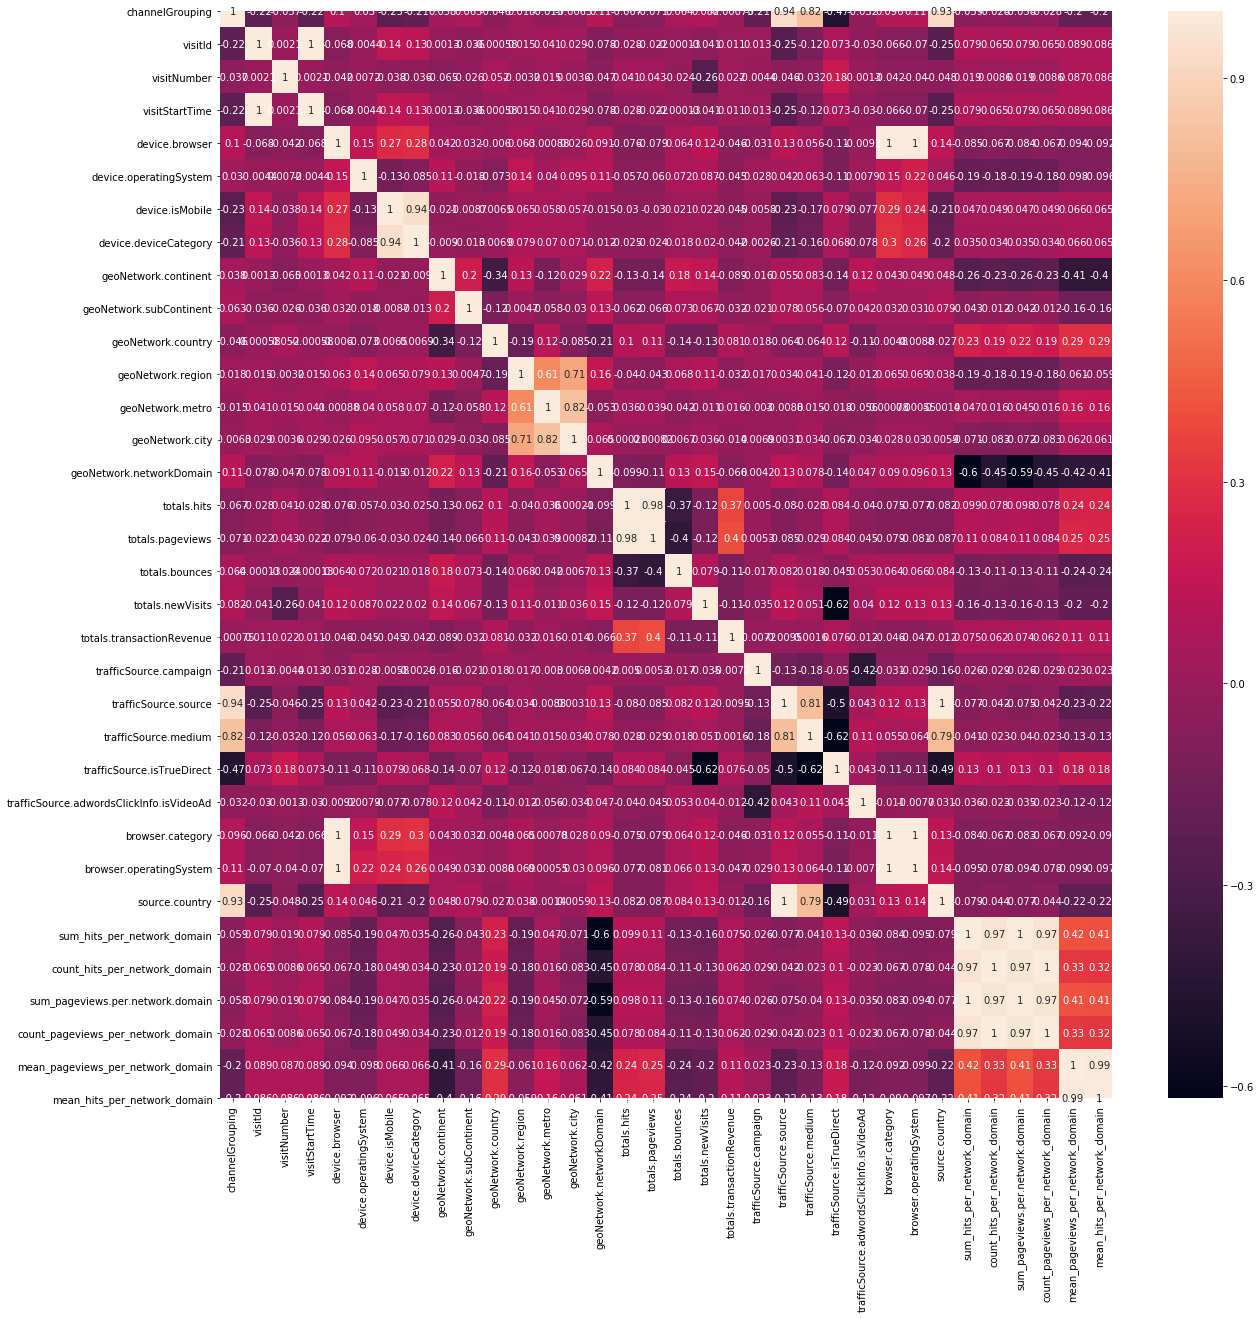

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(rfr.corr(),annot=True)

In [80]:
imp = get_feature_importance(model, Xx_train.columns.tolist())

In [81]:
px.bar(imp, x = 'feature', y = 'importance', color = 'feat_type')

###### we see a that the new features generated some predictive power